<a href="https://colab.research.google.com/github/gopalm-ai/Quantum_Machine_Learning_An_Applied_Approach/blob/main/ClosedOpenSystems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip3 install qiskit

     |████████████████████████████████| 6.4 MB 5.3 MB/s 
     |████████████████████████████████| 18.0 MB 559 kB/s 
     |████████████████████████████████| 238 kB 36.1 MB/s 
     |████████████████████████████████| 200 kB 70.2 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 
     |████████████████████████████████| 1.6 MB 23.9 MB/s 
     |████████████████████████████████| 943 kB 59.6 MB/s 
     |████████████████████████████████| 38.1 MB 229 kB/s 
     |████████████████████████████████| 49 kB 4.0 MB/s 
     |████████████████████████████████| 38.2 MB 1.4 MB/s 
     |████████████████████████████████| 49 kB 201 kB/s 
     |████████████████████████████████| 3.6 MB 34.2 MB/s 
     |████████████████████████████████| 112 kB 48.3 MB/s 
  Created wheel for qiskit: filename=qiskit-0.34.1-py3-none-any.whl size=11771 sha256=68ef01127cc7150c3792630c4e545721255d9a7de6fc51ed7459f54b670a0b88
  Stored in directory: /root/.cache/pip/wheels/79/b1/3f/8cdfd5543a84705e4bd16e081f2362b9b3bfd9898d2e2d

In [ ]:
! pip3 install pylatexenc

     |████████████████████████████████| 162 kB 13.5 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=1d296755ee7f8346f12b3773946a5e08591111efd750006cf2a672f2ced51d80
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [3]:
# Import Libraries
import numpy as np
from qiskit import *
X = np.array([[0, 1], [1, 0]])
print("XX^dagger")
print(X.dot(X.T.conj()))
print("X^daggerX")
print(X.T.conj().dot(X))

XX^dagger
[[1 0]
 [0 1]]
X^daggerX
[[1 0]
 [0 1]]


In [5]:
# Evolution of Norm
print("The norm of the state |0> before X is applied")
zero_ket = np.array([[1], [0]])
print(np.linalg.norm(zero_ket))
print("The norm of the state after X is applied")
print(np.linalg.norm(X.dot(zero_ket)))

The norm of the state |0> before X is applied
1.0
The norm of the state after X is applied
1.0


In [6]:
import numpy as np
from qiskit import *
from qiskit.tools.visualization import *
np.set_printoptions(precision=3, suppress=True)
backend_statevector = BasicAer.get_backend('statevector_simulator')
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)
circuit.x(q[0])
circuit.x(q[0])
job = execute(circuit, backend_statevector)
print(job.result().get_statevector(circuit))

[1.+0.j 0.+0.j]


In [7]:
# Maximally Mixed State
def mixed_state(pure_state, visibility):
  density_matrix = pure_state.dot(pure_state.T.conj())
  maximally_mixed_state = np.eye(4)/2**2
  return visibility*density_matrix + (1-visibility)*maximally_mixed_state

In [8]:
psi = np.array([[1],[0],[0],[1]])/np.sqrt(2)
print("Maximum visibility is a pure state:")
print(mixed_state(psi,1.0))
print("The state is still entangled with visibility 0.8:")
print(mixed_state(psi,0.8))
print("Entanglement is lost by 0.6:")
print(mixed_state(psi,0.6))
print("Hardly any coherence remains by 0.2:")
print(mixed_state(psi,0.2))

Maximum visibility is a pure state:
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
The state is still entangled with visibility 0.8:
[[0.45 0.   0.   0.4 ]
 [0.   0.05 0.   0.  ]
 [0.   0.   0.05 0.  ]
 [0.4  0.   0.   0.45]]
Entanglement is lost by 0.6:
[[0.4 0.  0.  0.3]
 [0.  0.1 0.  0. ]
 [0.  0.  0.1 0. ]
 [0.3 0.  0.  0.4]]
Hardly any coherence remains by 0.2:
[[0.3 0.  0.  0.1]
 [0.  0.2 0.  0. ]
 [0.  0.  0.2 0. ]
 [0.1 0.  0.  0.3]]


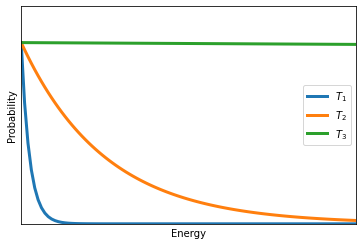

In [9]:
# Boltzmann Distribution
import matplotlib.pyplot as plt
temperatures = [0.5, 5, 2000]
energies = np.linspace(0, 20, 100)
fig, ax = plt.subplots()
for i, T in enumerate(temperatures):
  probabilities = np.exp(-energies/T)
  Z = probabilities.sum()
  probabilities /- Z
  ax.plot(energies, probabilities, linewidth=3, label= "$T_" + str(i+1)+"$")
ax.set_xlim(0, 20)
ax.set_ylim(0, 1.2*probabilities.max())
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Energy')
ax.set_ylabel('Probability')
ax.legend()